In [1]:
from pathlib import Path
import torch
import torchvision.transforms as T

from hydra.utils import instantiate

from utils.notebooks import load_model
from utils.img import unnormalize
from utils.visualization import plot_feats

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
project_root = str(Path().absolute())

In [12]:
from PIL import Image

# Load an image
latent_w = 32
latent_h = 18
patch_size = 14
input_w = latent_w * patch_size
input_h = latent_h * patch_size

image_path = "/root/repos/vlmaps/data/allmend_trail_recording_2025_12_06_full_trail_zed_sdk/images/02271.png"
image = Image.open(image_path).convert("RGB")

print("Image shape:", image.size)

# Transform the image to match the input requirements of the model
mean = torch.tensor([0.485, 0.456, 0.406], device=device)
std = torch.tensor([0.229, 0.224, 0.225], device=device)
# transform = T.Compose(
#     [
#         T.Resize(img_size),
#         T.CenterCrop(img_size),
#         T.ToTensor(),  # Convert to tensor
#         T.Normalize(mean=mean, std=std),  # Normalize
#     ]
# )
transform = T.Compose(
    [
        T.Resize((input_h, input_w)),
        T.ToTensor(),  # Convert to tensor
        T.Normalize(mean=mean, std=std),  # Normalize
    ]
)
image_batch = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

print("Image batch shape:", image_batch.shape)

Image shape: (1280, 720)
Image batch shape: torch.Size([1, 3, 252, 448])


/root/workspaces/thesis_ws/src/JAFAR/utils/img.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean = torch.tensor(mean).view(1, 3, 1, 1).to("cuda")  # Reshape to (1, C, 1, 1) for broadcasting
/root/workspaces/thesis_ws/src/JAFAR/utils/img.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std = torch.tensor(std).view(1, 3, 1, 1).to("cuda")  # Reshape to (1, C, 1, 1) for broadcasting


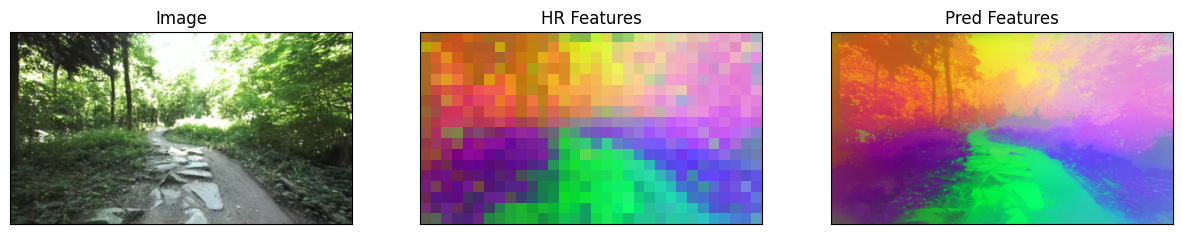

In [13]:
backbone = "vit_small_patch14_reg4_dinov2"

model, backbone = load_model(backbone, project_root)
lr_feats, _ = backbone(image_batch)
hr_feats = model(image_batch, lr_feats, (input_h, input_w))
unorm_img_batch = unnormalize(image_batch, mean, std)
plot_feats(unorm_img_batch[0],lr_feats[0],hr_feats[0])

In [5]:
lr_feats.shape

torch.Size([1, 384, 32, 32])

In [6]:
hr_feats.shape

torch.Size([1, 384, 448, 448])

In [7]:
unorm_img_batch.shape

torch.Size([1, 3, 448, 448])